<a href="https://colab.research.google.com/github/Hamid-Mofidi/Python_Intro_for_Machine_Learning/blob/main/Pyth_intro_6(Gradient_descent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is a simple example of gradient descent in one dimension using Python:

Suppose we want to find the minimum of a convex function f(x) = x^2. We can use gradient descent to find the minimum by iteratively updating the value of x as follows:


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-55-4d223c5092de>:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [56]:
# Define the function to minimize
def f(x):
    return 3*x**2 - 3*x + 4

# Define the derivative of the function
def df(x):
    return 6*x - 3

In [57]:
x_range = np.linspace(-2, 3, 10001)
# Set the initial value of x
locmin = np.random.choice(x_range,1) # it randomly pick 1 value in x_range
print(locmin)

# Set the learning rate
alpha = 0.01

# Set the number of iterations
num_iterations = 100

# Perform gradient descent
locmin_values = [locmin]
for i in range(num_iterations):
    # Compute the gradient
    gradient = df(locmin)
    # Update x
    locmin = locmin - alpha * gradient
    # Add x to the list of x values
    locmin_values.append(locmin)

locmin

[-0.016]


array([0.49893968])

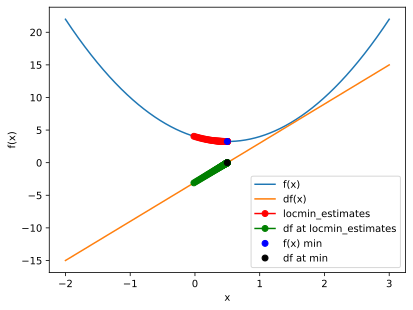

In [58]:
# Plot the function and the path taken by gradient descent
y_range = f(x_range)
yderiv_range = df(x_range)
plt.plot(x_range, y_range, x_range, yderiv_range)
plt.plot(locmin_values, [f(x) for x in locmin_values], 'ro-')
plt.plot(locmin_values, [df(x) for x in locmin_values], 'go-')
plt.plot(locmin, f(locmin), 'bo')
plt.plot(locmin, df(locmin), 'ko')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df(x)', 'locmin_estimates ', 'df at locmin_estimates', 'f(x) min', 'df at min' ])
plt.show()

# Store the model parameters and outputs on each iteration

In [62]:

# random starting point
localmin = np.random.choice(x_range,1)

# learning parameters
learning_rate = .01
num_iterations = 100

# run through training and store all the results
modelparams = np.zeros((num_iterations,2))
for i in range(num_iterations):
  grad = df(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,0] = localmin
  modelparams[i,1] = grad

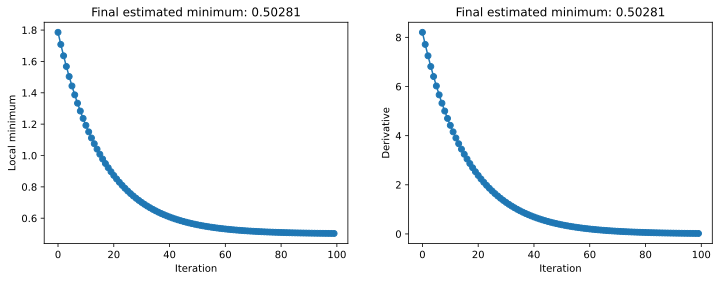

In [63]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

In [65]:
# function (as a function)
def fx(x):
  return np.cos(2*np.pi*x) + x**2

# derivative function
def deriv(x):
  return -2*np.pi*np.sin(2*np.pi*x) + 2*x

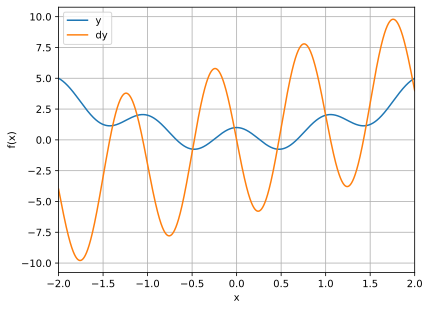

In [67]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [68]:
# random starting point
localmin = np.random.choice(x,1) #np.array([0])#

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

array([-0.47580245])

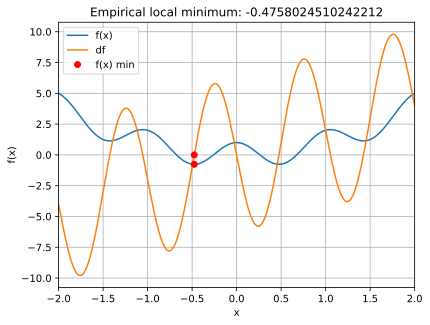

In [69]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

The `lambdify` function in Python is a utility provided by the SymPy library that allows you to convert a SymPy expression into a callable function. 

When you define a function using SymPy, it creates a symbolic expression that represents the function. This expression can be manipulated algebraically, but it cannot be directly evaluated or used in numerical computations. To use the function in numerical computations, you need to convert it to a callable function that can accept numerical inputs and return numerical outputs. 

The `lambdify` function allows you to do this by creating a Python function that evaluates the SymPy expression using NumPy functions. The resulting function can be used in numerical computations just like any other Python function. 

Here's an example that demonstrates how to use `lambdify`:

In [78]:
import numpy as np
from sympy import symbols, sin, lambdify

# Define a symbolic expression
x, y = symbols('x y')
expr = sin(x) + y**2

# Create a callable function from the expression
f = lambdify((x, y), expr, 'numpy')

# Evaluate the function at a point
result = f(np.pi/2, 2)
print(result)

5.0


In this example, we define a symbolic expression `sin(x) + y**2` using SymPy. We then use `lambdify` to create a callable function `f` from the expression. The first argument to `lambdify` is a tuple of the input variables `(x, y)`, the second argument is the expression to be evaluated, and the third argument is the module to use for numerical evaluation (in this case, we use NumPy).

We can then use the resulting function `f` to evaluate the expression at a point `(np.pi/2, 2)` and print the result. The output should be approximately `4.0`.

## **Gradient descent in 2D**

In [82]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
     

In [83]:
# the "peaks" function
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)
  
  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

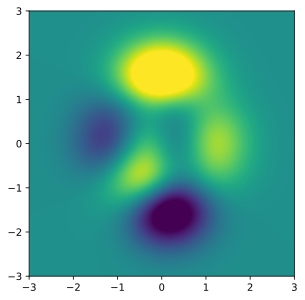

In [84]:
# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [85]:
# create derivative functions using sympy

sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

df_x(1,1).evalf()

-1.07369833656079

In [86]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(), 
                    df_y(localmin[0],localmin[1]).evalf() 
                  ])
  localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
  trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[0.296445553846832 0.320196247666834]
[ 0.6943278  -0.30834296]


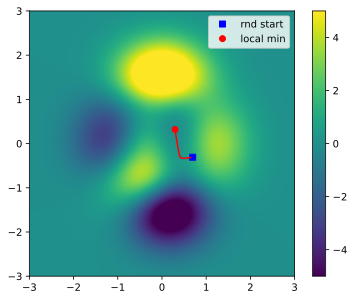

In [87]:
# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()